## 6. 加载数据为张量--图像

In [1]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123456)

print("")

### 6.1 加载图像文件
我们先要准备好一张图片，可自行修改图片路径，我们这里选择了一个`32 x 32`的RGB图片。  
可参考`02-torchvison.datasets-保存图片到文件中.ipynb`中创建相关图片。

#### 1. 采用Pillow加载图片

In [2]:
from PIL import Image

In [3]:
image_path = "../../data/images/CIFAR10/automobile/automobile_99.png"

In [4]:
img = Image.open(image_path)

In [5]:
type(img), img.size

(PIL.PngImagePlugin.PngImageFile, (32, 32))

**将PIL的Image对象转换为Numpy数组**

In [6]:
img_arr = np.array(img)

In [7]:
type(img_arr), img_arr.shape

(numpy.ndarray, (32, 32, 3))

In [8]:
img_arr

array([[[ 62,  64,  44],
        [ 50,  50,  26],
        [ 46,  44,  19],
        ...,
        [167, 172,  69],
        [183, 184,  76],
        [137, 136,  72]],

       [[ 63,  65,  37],
        [ 55,  53,  26],
        [ 52,  50,  27],
        ...,
        [163, 169,  61],
        [171, 174,  75],
        [145, 146,  77]],

       [[ 58,  62,  36],
        [ 64,  66,  37],
        [ 56,  60,  37],
        ...,
        [153, 155,  62],
        [150, 154,  64],
        [123, 128,  57]],

       ...,

       [[172, 135,  99],
        [143, 110,  84],
        [130,  56,  42],
        ...,
        [ 94,  75,  56],
        [141, 108,  86],
        [139, 105,  81]],

       [[183, 146, 117],
        [150, 118,  95],
        [ 80,  64,  44],
        ...,
        [ 81,  72,  60],
        [135, 118,  98],
        [143, 125, 110]],

       [[209, 174, 144],
        [182, 151, 123],
        [139, 109,  83],
        ...,
        [ 59,  54,  47],
        [130, 119, 111],
        [169, 156, 160]]

#### 2. 采用imageio加载图片

安装库：`pip install imageio`. 

In [9]:
#!pip install imageio

In [10]:
import imageio.v2 as imageio

In [11]:
img_arr2 = imageio.imread(image_path)

In [12]:
type(img_arr2), img_arr2.shape

(numpy.ndarray, (32, 32, 3))

> 此时：图片`img_arr`和`img_arr2`是具有3个维度的`Numpy`数组对象，2个空间维度尺寸（宽度、高度）和一个红绿蓝颜色通道。    
> **注意：** PyTorch张量要求排列为通道、高度和宽度(`C x H x W`) 。   
> 那么我们可以使用`torch.permute(2, 0, 1)`把`H x W x C`格式的改为`C x H x W`。

In [13]:
img_arr2

array([[[ 62,  64,  44],
        [ 50,  50,  26],
        [ 46,  44,  19],
        ...,
        [167, 172,  69],
        [183, 184,  76],
        [137, 136,  72]],

       [[ 63,  65,  37],
        [ 55,  53,  26],
        [ 52,  50,  27],
        ...,
        [163, 169,  61],
        [171, 174,  75],
        [145, 146,  77]],

       [[ 58,  62,  36],
        [ 64,  66,  37],
        [ 56,  60,  37],
        ...,
        [153, 155,  62],
        [150, 154,  64],
        [123, 128,  57]],

       ...,

       [[172, 135,  99],
        [143, 110,  84],
        [130,  56,  42],
        ...,
        [ 94,  75,  56],
        [141, 108,  86],
        [139, 105,  81]],

       [[183, 146, 117],
        [150, 118,  95],
        [ 80,  64,  44],
        ...,
        [ 81,  72,  60],
        [135, 118,  98],
        [143, 125, 110]],

       [[209, 174, 144],
        [182, 151, 123],
        [139, 109,  83],
        ...,
        [ 59,  54,  47],
        [130, 119, 111],
        [169, 156, 160]]

In [14]:
# 可以发现imageio加载的图片和 Pillow加载图片后再转为numpy数组，其值是一样的
np.all(img_arr == img_arr2)

True

### 6.2 使用matplotlib.pyplot显示图片

> 验证：imageio和Pillow加载的图片，其三维分别是：`height`、`width`、`channels`。

#### 1. 展示左半边图片

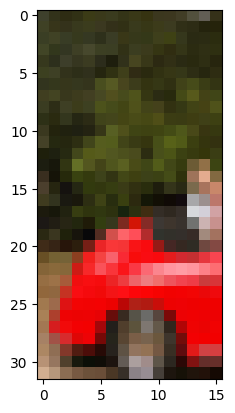

In [15]:
# 第一维度：全部取出，第二维度：取一半，第三维：全部取出
plt.imshow(img_arr[:,:16,:])
print("")

#### 2. 展示下半部分图片

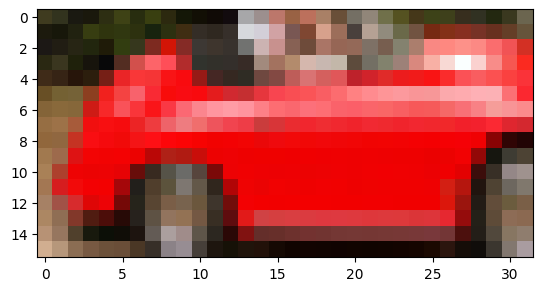

In [16]:
plt.imshow(img_arr[16:,:,:])
print("")

### 6.3 改变图片布局
我们可以用张量的`permute()`方法使每个新的维度利用旧维度得到一个新的布局。     
`imageio`加载的图片其布局是：`H x W x C`，我们现在把它改为：`C x H x W`布局。

In [17]:
img_arr.shape

(32, 32, 3)

In [18]:
img_t = torch.from_numpy(img_arr)
type(img_t), img_t.shape, img_t.stride()

(torch.Tensor, torch.Size([32, 32, 3]), (96, 3, 1))

In [19]:
img_t2 = img_t.permute(2, 0, 1)
type(img_t2), img_t2.shape, img_t2.stride()

(torch.Tensor, torch.Size([3, 32, 32]), (1, 96, 3))

In [20]:
img_t.untyped_storage() == img_t2.untyped_storage()

True

> 可以看到`img_t2`使用与`img_t`相同的底层存储。

In [21]:
img_t.shape, img_t2.shape

(torch.Size([32, 32, 3]), torch.Size([3, 32, 32]))

In [22]:
img_t[0, 0, :]

tensor([62, 64, 44], dtype=torch.uint8)

In [23]:
img_t2[:, 0, 0]

tensor([62, 64, 44], dtype=torch.uint8)

### 6.4 加载多张图片

In [24]:
image_path_dir = "../../data/images/CIFAR10/automobile/"

In [25]:
import os

In [26]:
# 先查看一下，图片目录中的图片
images = os.listdir(image_path_dir)
images

['automobile_75.png',
 'automobile_61.png',
 'automobile_60.png',
 'automobile_99.png',
 'automobile_64.png',
 'automobile_65.png',
 'automobile_4.png',
 'automobile_32.png',
 'automobile_5.png',
 'automobile_97.png',
 'automobile_96.png',
 'automobile_94.png',
 'automobile_46.png',
 'automobile_79.png',
 'automobile_45.png',
 'automobile_44.png']

In [27]:
# 查看图片长度
len(images)

16

In [28]:
# 创建一个: 16, 3, 32, 32维的张量存储图片
count = len(images)
# 图像尺寸是32 x 32，颜色通道是RGB的
images_torch = torch.zeros(count, 3, 32, 32, dtype=torch.uint8)

In [29]:
images_torch.shape

torch.Size([16, 3, 32, 32])

In [30]:
# 遍历图片
for i, filename in enumerate(images):
    file_path = os.path.join(image_path_dir, filename)

    # 不是以png,jpg结尾的，直接跳过
    if os.path.splitext(filename)[-1] not in [".png", ".jpg"]:
        continue

    # 加载图片，然后改变张量的形状
    img_arr = imageio.imread(file_path)
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1) # 改为 c h w
    # 确保图片只保留3个通道
    if img_t.shape[0] > 4:
        img_t = img_t[:3]
    # 加入到images_torch中
    images_torch[i] = img_t

In [31]:
images_torch[-1,:,:,:]

tensor([[[139, 144,  ..., 131, 129],
         [139, 124,  ..., 108, 114],
         ...,
         [132, 124,  ..., 131, 132],
         [110, 124,  ..., 128, 112]],

        [[154, 160,  ..., 142, 141],
         [148, 137,  ..., 112, 127],
         ...,
         [109, 105,  ..., 112, 110],
         [108, 116,  ..., 114, 105]],

        [[188, 192,  ...,  76,  70],
         [180, 167,  ...,  76,  68],
         ...,
         [ 74,  69,  ...,  74,  70],
         [ 52,  67,  ...,  75,  59]]], dtype=torch.uint8)

### 6.5 正规化数据

神经网络通常使用浮点数张量作为输入，当输入的数据范围是：`0~1`或者`-1~1`时，神经网络的训练性能最佳。   
而我们上面的图片数据类型是`torch.uint8`， 现在将这个张量转换为浮点数并对像素的值进行归一化。     

将数据转换为浮点数比较简单，除以个数即可，这里我们可以除以255（`uint8`无符号二进制八位最大的标示值是255）。     
但是归一化要复杂很多，因为这个取决于输入范围，是`0~1`还是`-1~1`。


In [32]:
images_torch.shape, images_torch.dtype

(torch.Size([16, 3, 32, 32]), torch.uint8)

#### 正规化方式1：
除以255

In [33]:
images_torch = images_torch.float()
images_torch /= 255.0
images_torch.shape, images_torch.dtype

(torch.Size([16, 3, 32, 32]), torch.float32)

#### 正规化方式2: 
计算输入数据的均值和标准差，并对其进行缩放，使每个通道的均值为0，标准差为1

In [34]:
channels_count = images_torch.shape[1]

In [35]:
# RGB的图像，那么其通道是3
channels_count

3

In [36]:
for c in range(channels_count):
    mean = torch.mean(images_torch[:, c])
    std = torch.std(images_torch[:, c])
    images_torch[:, c] = (images_torch[:, c] - mean) / std

In [37]:
images_torch[-1, :, :, :]

tensor([[[ 0.2926,  0.3707,  ...,  0.1677,  0.1365],
         [ 0.2926,  0.0584,  ..., -0.1915, -0.0978],
         ...,
         [ 0.1833,  0.0584,  ...,  0.1677,  0.1833],
         [-0.1602,  0.0584,  ...,  0.1208, -0.1290]],

        [[ 0.7259,  0.8232,  ...,  0.5313,  0.5151],
         [ 0.6286,  0.4502,  ...,  0.0447,  0.2880],
         ...,
         [-0.0040, -0.0688,  ...,  0.0447,  0.0123],
         [-0.0202,  0.1096,  ...,  0.0771, -0.0688]],

        [[ 1.2602,  1.3205,  ..., -0.4294, -0.5200],
         [ 1.1395,  0.9434,  ..., -0.4294, -0.5501],
         ...,
         [-0.4596, -0.5351,  ..., -0.4596, -0.5200],
         [-0.7915, -0.5652,  ..., -0.4445, -0.6859]]])